In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import glob
import copy
import scipy.misc as scpm
from collections import Counter

%matplotlib inline

In [2]:
modelar = pd.read_csv('data/Modelar_UH2019.txt', sep="|")
estimar = pd.read_csv('data/Estimar_UH2019.txt', sep="|")

print('Modelar:', modelar.shape, 'Estimar:', estimar.shape)

Modelar: (9958, 53) Estimar: (1104, 52)


In [3]:
modelar.head()

,HY_id,HY_cod_postal,HY_provincia,HY_descripcion,HY_distribucion,HY_tipo,HY_antiguedad,HY_metros_utiles,HY_metros_totales,HY_num_banos,...,IDEA_unitprice_rent_residential,IDEA_price_rent_residential,IDEA_stock_rent_residential,IDEA_demand_rent_residential,GA_page_views,GA_mean_bounce,GA_exit_rate,GA_quincena_ini,GA_quincena_ult,TARGET
0,6028499,18151,Granada,Plaza de Garaje ubicada en la planta sótano de...,NaN,Garaje,NaN,NaN,35.00,0,...,5.09,626.38,237.0,51.01,71,7.14,10.65,2,46,32.16
1,6028500,29915,Málaga,NaN,NaN,Casa de pueblo,NaN,NaN,151.98,2,...,4.08,700.00,6.0,50.69,684,16.36,5.25,1,47,30.71
2,6028502,3740,Alicante,El inmueble(piso) se encuentra situado en el d...,VIVIENDA-PISO,Piso,2008.0,92.58,102.78,1,...,4.43,525.00,15.0,51.82,651,15.12,11.21,1,47,63.48
3,6028512,30592,Murcia,Plaza de garaje situada en la planta semisótan...,NaN,Garaje,NaN,11.81,12.46,0,...,5.03,863.17,168.0,50.74,92,15.82,14.55,2,47,108.27
4,6028513,30592,Murcia,Plaza de garaje situada en la planta semisótan...,NaN,Garaje,NaN,14.29,15.43,0,...,5.03,863.17,168.0,50.74,3,0.00,0.00,2,39,7.50


In [33]:
num_anuncios=modelar[['HY_id','HY_cod_postal']].groupby('HY_cod_postal').count().rename(columns={'HY_id':'Num_anuncios'})

In [34]:
num_anuncios.head()

,Num_anuncios
HY_cod_postal,
2001,1
2006,21
2007,2
2100,1
2156,6


In [45]:
result=pd.merge(modelar, num_anuncios, how='left', on='HY_cod_postal')


In [49]:
result

,HY_id,HY_cod_postal,HY_provincia,HY_descripcion,HY_distribucion,HY_tipo,HY_antiguedad,HY_metros_utiles,HY_metros_totales,HY_num_banos,...,IDEA_price_rent_residential,IDEA_stock_rent_residential,IDEA_demand_rent_residential,GA_page_views,GA_mean_bounce,GA_exit_rate,GA_quincena_ini,GA_quincena_ult,TARGET,Num_anuncios
0,6028499,18151,Granada,Plaza de Garaje ubicada en la planta sótano de...,NaN,Garaje,NaN,NaN,35.00,0,...,626.38,237.0,51.01,71,7.14,10.65,2,46,32.16,3
1,6028500,29915,Málaga,NaN,NaN,Casa de pueblo,NaN,NaN,151.98,2,...,700.00,6.0,50.69,684,16.36,5.25,1,47,30.71,1
2,6028502,3740,Alicante,El inmueble(piso) se encuentra situado en el d...,VIVIENDA-PISO,Piso,2008.0,92.58,102.78,1,...,525.00,15.0,51.82,651,15.12,11.21,1,47,63.48,3
3,6028512,30592,Murcia,Plaza de garaje situada en la planta semisótan...,NaN,Garaje,NaN,11.81,12.46,0,...,863.17,168.0,50.74,92,15.82,14.55,2,47,108.27,20
4,6028513,30592,Murcia,Plaza de garaje situada en la planta semisótan...,NaN,Garaje,NaN,14.29,15.43,0,...,863.17,168.0,50.74,3,0.00,0.00,2,39,7.50,20
5,6028514,30592,Murcia,Piso de dos dormitorios y baño en la tercera p...,"Se distribuye en recibidor, salón comedor, coc...",Piso,NaN,48.10,54.24,1,...,433.86,24.0,51.69,318,20.41,11.87,1,47,41.06,20
6,6028515,30592,Murcia,Piso de un dormitorio y baño en la tercera pla...,"Se distribuye en salón comedor, cocina, lavade...",Piso,NaN,48.05,55.90,1,...,433.86,24.0,51.69,39,4.55,18.07,2,46,43.17,20
7,6028520,4120,Almería,Local comercial en bruto en la planta baja de ...,NaN,Local,2009.0,931.17,956.98,0,...,731.75,93.0,51.06,168,0.50,7.26,1,46,80.40,40
8,6028523,46600,Valencia,Plaza de garaje situada en la Gran Vía de la C...,NaN,Garaje,NaN,11.87,22.26,0,...,NaN,NaN,0.00,7,33.33,50.00,6,45,219.17,101
9,6028526,12500,Castellón,Plaza de garaje situada en la Avenida Castelló...,NaN,Garaje,NaN,NaN,29.00,0,...,325.00,27.0,52.01,182,35.81,39.51,2,47,42.74,29


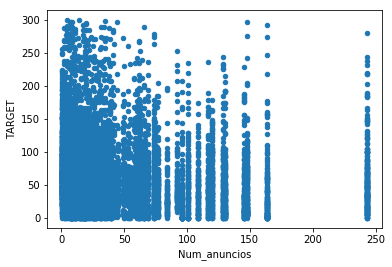

In [64]:
result[['Num_anuncios','TARGET']].loc[result[['Num_anuncios','TARGET']]['TARGET']<300].plot(x='Num_anuncios',y='TARGET',kind='scatter')

              Num_anuncios    TARGET
Num_anuncios      1.000000 -0.170931
TARGET           -0.170931  1.000000


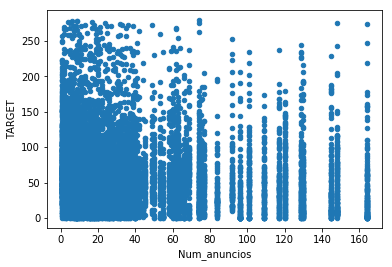

In [70]:
result[['Num_anuncios','TARGET']].loc[(result[['Num_anuncios','TARGET']]['TARGET']<280) & (result[['Num_anuncios','TARGET']]['Num_anuncios']<200)].plot(x='Num_anuncios',y='TARGET',kind='scatter')
print(result[['Num_anuncios','TARGET']].loc[(result[['Num_anuncios','TARGET']]['TARGET']<280) & (result[['Num_anuncios','TARGET']]['Num_anuncios']<200)].corr())

# Piscina

# Luminosidad